In [119]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [120]:
batch_size = 32
img_height = 128
img_width = 128

In [121]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

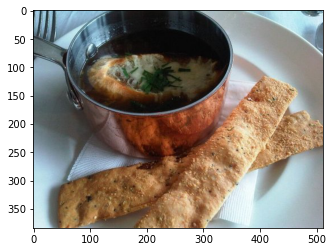

In [122]:
food = plt.imread('../images_used/training/food/0.jpg')
plt.imshow(food)

In [123]:
# Creating a ImageGenerator
train_datagen = ImageDataGenerator(
                    rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory='../images_used/training',
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 3000 images belonging to 2 classes.


In [124]:
# Creating Validation Generator
valid_datagen = ImageDataGenerator(
                    rescale = 1./255)

valid_generator = valid_datagen.flow_from_directory(directory='../images_used/validation',
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [125]:
# Creating Validation Generator
test_datagen = ImageDataGenerator(
                    rescale = 1./255)

test_generator = test_datagen.flow_from_directory(directory='../images_used/evaluation',
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [126]:
test_generator = test_datagen.flow_from_directory(directory='../images_used/evaluation',
                                                   batch_size=1,
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 128)      

In [127]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [128]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 30, 30, 128)      

In [129]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
from tensorflow.keras.callbacks import EarlyStopping

In [131]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, mode='max')

In [132]:
history = model.fit(train_generator, epochs=100,validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/100
94/94 [==============================] - 83s 881ms/step - loss: 0.7969 - accuracy: 0.6083 - val_loss: 0.4919 - val_accuracy: 0.7880
Epoch 2/100
94/94 [==============================] - 81s 856ms/step - loss: 0.5323 - accuracy: 0.7423 - val_loss: 0.5467 - val_accuracy: 0.7660
Epoch 3/100
94/94 [==============================] - 81s 864ms/step - loss: 0.4337 - accuracy: 0.8050 - val_loss: 0.4707 - val_accuracy: 0.7870
Epoch 4/100
94/94 [==============================] - 81s 857ms/step - loss: 0.3570 - accuracy: 0.8463 - val_loss: 0.3352 - val_accuracy: 0.8690
Epoch 5/100
94/94 [==============================] - 80s 853ms/step - loss: 0.2837 - accuracy: 0.8813 - val_loss: 0.3403 - val_accuracy: 0.8650
Epoch 6/100
94/94 [==============================] - 83s 884ms/step - loss: 0.2711 - accuracy: 0.8947 - val_loss: 0.2598 - val_accuracy: 0.8920
Epoch 7/100
94/94 [==============================] - 82s 871ms/step - loss: 0.2024 - accuracy: 0.9187 - val_loss: 0.2601 - val_accuracy:

In [133]:
history_eval = model.evaluate(test_generator,steps=len(test_generator))

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1093 - accuracy: 0.9580


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


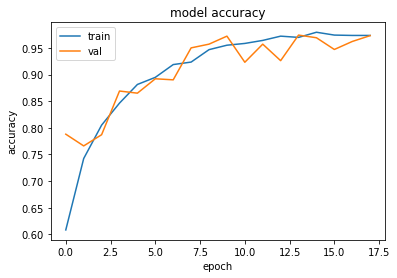

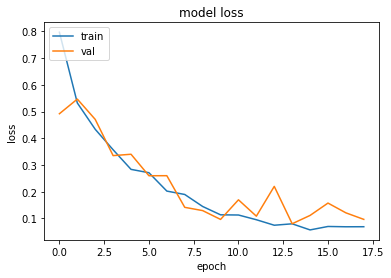

[0.10934772342443466, 0.9580000042915344]


In [134]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print(history_eval)

In [135]:
misclassified_images = []
correctly_classified = []
for _ in range(1000):
    img, label = test_generator.next()
    y_val_pred = model.predict(img)
    if np.round(y_val_pred) != label:
        misclassified_images.append((img,label))
    else:
        correctly_classified.append((img,label))

In [136]:
print(len(misclassified_images))
print(len(correctly_classified))

42
958


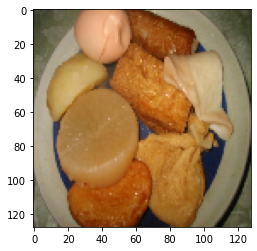

In [137]:
for i in range(5):
    img,label_mis = misclassified_images[i]
    plt.imshow(img[0])
    plt.imsave(f"Misclassified_{i}.jpg", img[0])
#     plt.show()

In [138]:
label_mis

array([0.], dtype=float32)

In [139]:
img,label_mis = misclassified_images[0]
y_label = model.predict(img)
y_label

array([[0.04563236]], dtype=float32)

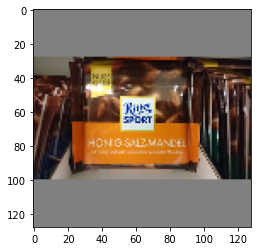

In [140]:
for i in range(5):
    img,label_correct = correctly_classified[i]
    plt.imshow(img[0])
    plt.imsave(f"Correctly_classified_{i}.jpg", img[0])
# plt.show()


In [141]:
label_correct

array([1.], dtype=float32)

In [142]:
img,label_correct = correctly_classified[0]
y_label = model.predict(img)
y_label

array([[1.4834363e-08]], dtype=float32)

In [143]:
from tensorflow.keras.models import Model

m2 = Model(inputs=model.input, outputs=model.layers[0].output)

m2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [144]:
m_imgs_labels =misclassified_images[:5]
m_imgs = [m_img[0] for  m_img in m_imgs_labels]

c_imgs_labels =correctly_classified[:5]
c_imgs = [c_img[0] for  c_img in c_imgs_labels]

In [145]:
m_imgs[0].shape

(1, 128, 128, 3)

In [146]:
cnn_c_imgs = []
for c_img in c_imgs:
    cnn_c_imgs.append(m2.predict(c_img))

In [147]:
selected_batch = cnn_c_imgs[0]

In [148]:
selected_batch = selected_batch[0]
selected_batch.shape

(126, 126, 64)

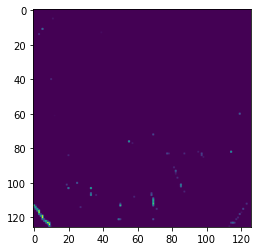

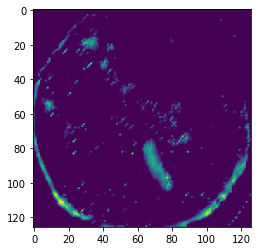

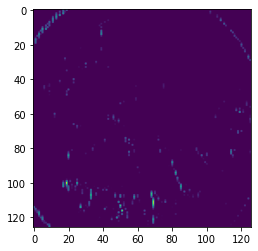

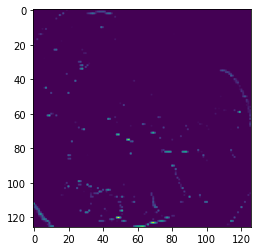

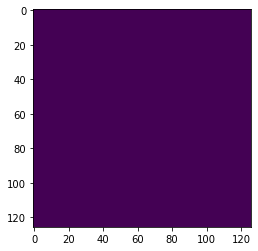

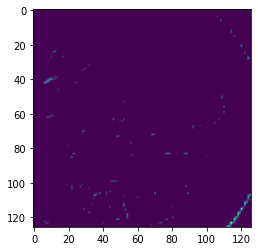

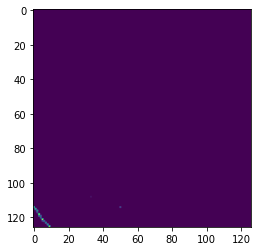

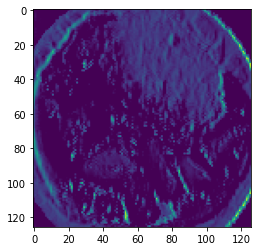

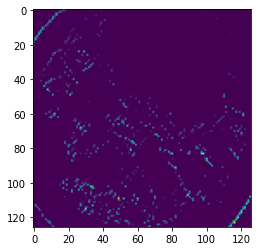

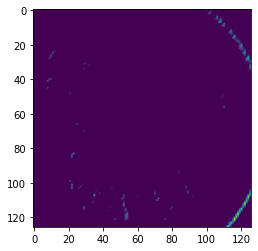

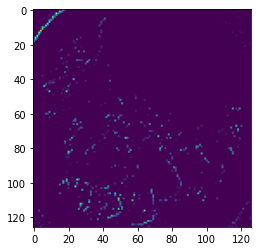

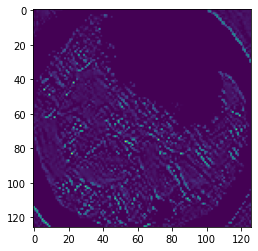

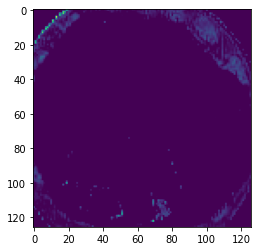

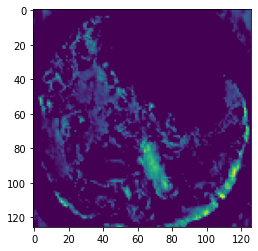

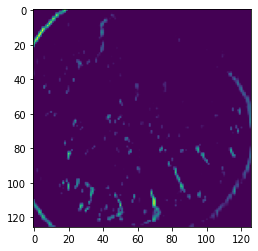

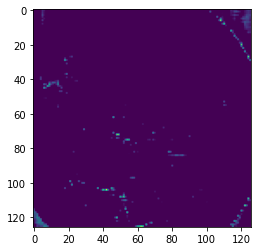

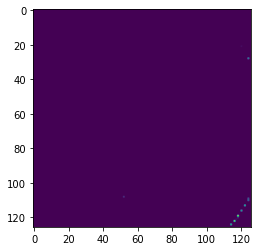

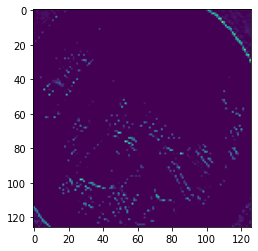

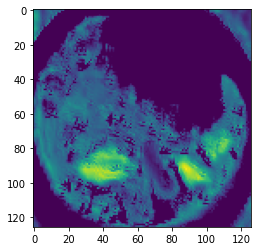

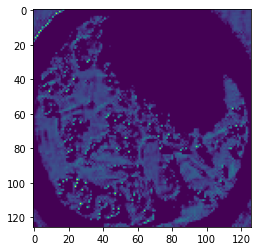

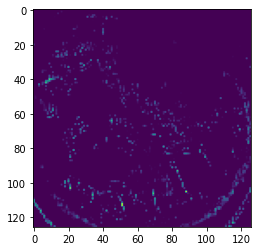

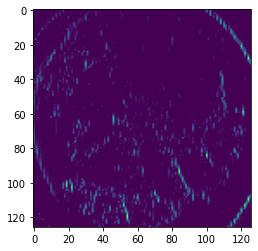

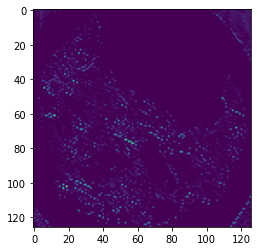

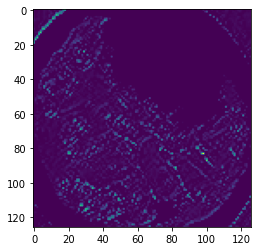

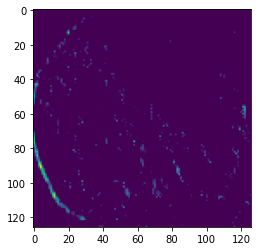

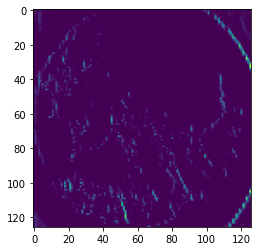

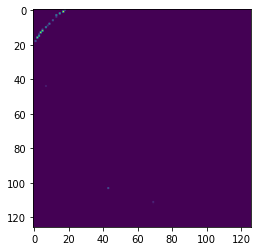

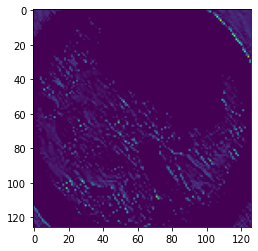

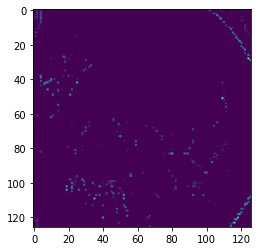

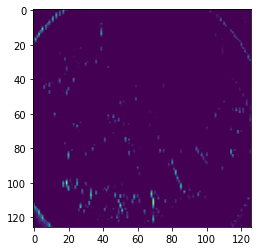

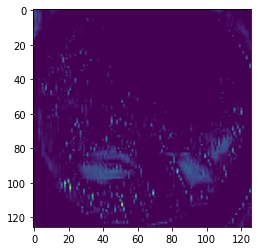

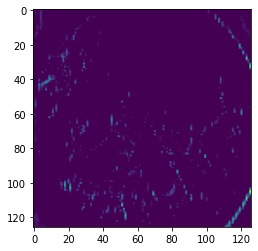

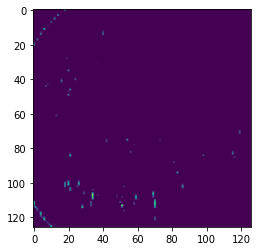

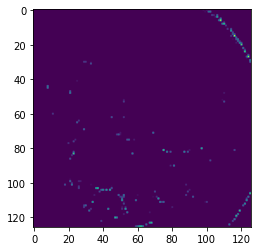

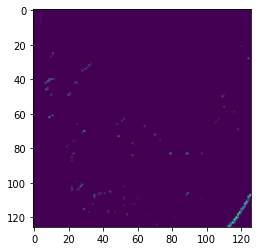

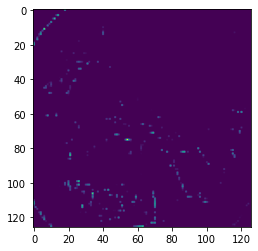

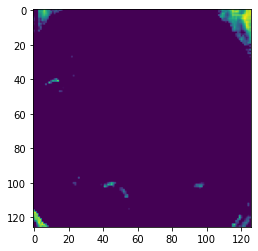

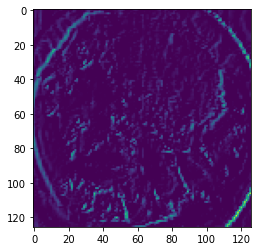

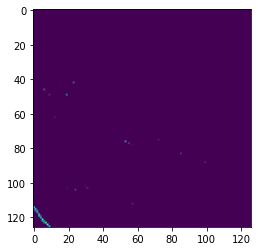

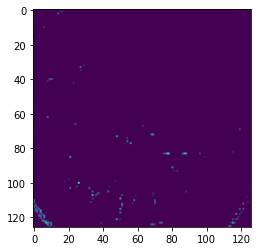

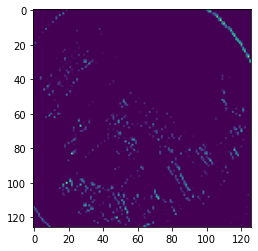

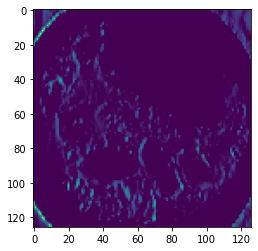

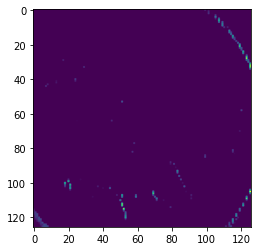

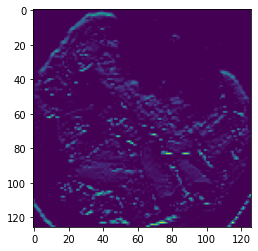

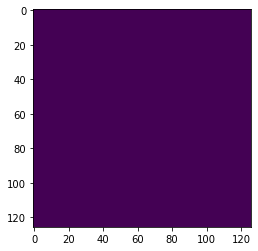

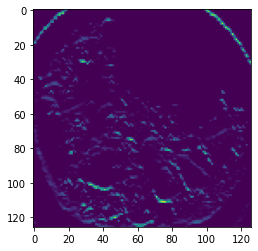

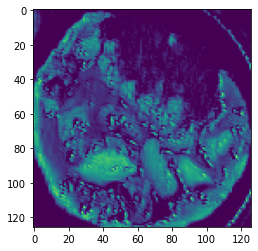

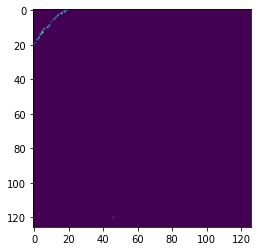

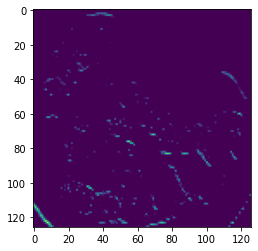

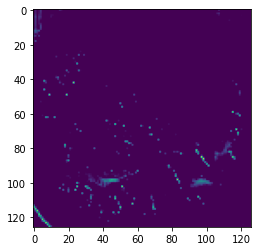

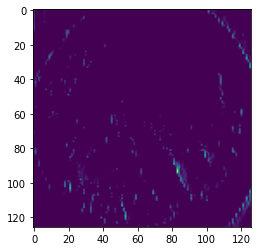

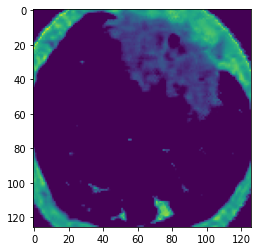

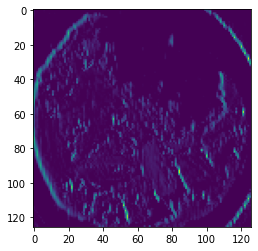

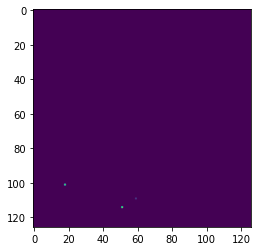

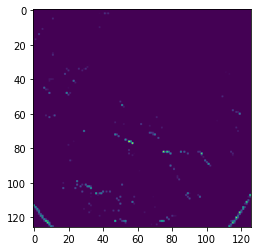

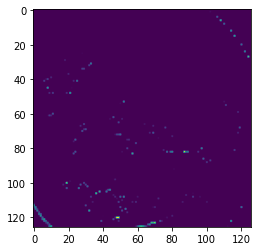

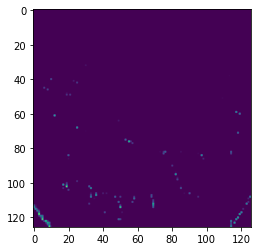

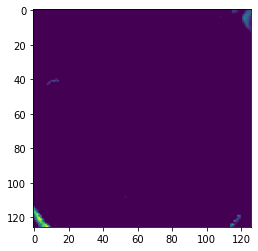

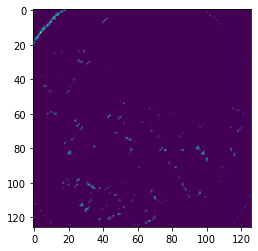

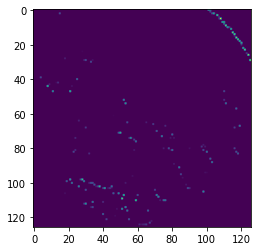

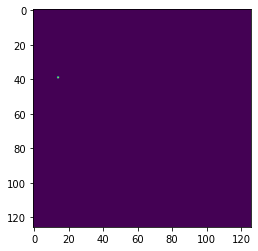

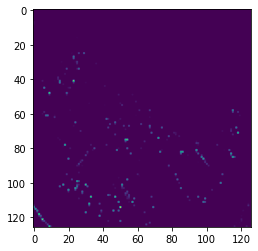

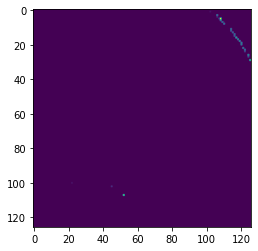

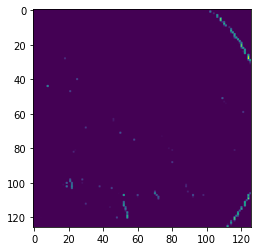

In [149]:
for i in range(64):
    plt.figure()
    plt.imshow(selected_batch[:, :, i])
    plt.imsave(f"cnn_feature_channel_{i}.jpg", selected_batch[:, :, i])
    plt.show()

In [150]:
mis_class_test = plt.imread('../images_used/evaluation/packaged_food/CEREAL0048.jpg')
mis_class_test = tf.image.resize(mis_class_test, [128,128])

In [151]:
testing_datagen = ImageDataGenerator(
                    rescale = 1./255)

In [152]:
mis_class_test = testing_datagen.standardize(mis_class_test)
mis_class_test = np.array(mis_class_test)
cnn_test_imgs = m2.predict(mis_class_test.reshape(1, 128,128,-1))
y_pred = model.predict(mis_class_test.reshape(1,128,128,-1))

In [153]:
y_pred

array([[0.99999034]], dtype=float32)

In [154]:
cnn_test_imgs = cnn_test_imgs[0]

In [155]:
for i in range(64):
    plt.imsave(f"Misclassified_{i}.jpg", cnn_test_imgs[:,:,i])

In [156]:
cnn_m_imgs = []
for m_img in m_imgs:
    cnn_m_imgs.append(m2.predict(m_img))

In [157]:
selected_batch = cnn_m_imgs[0]

In [158]:
selected_batch = selected_batch[0]
selected_batch.shape

(126, 126, 64)

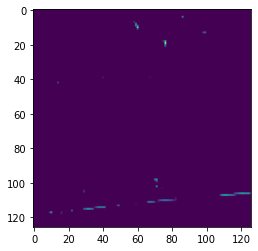

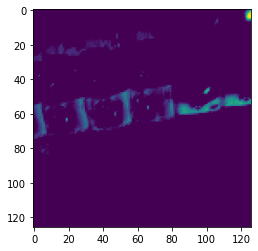

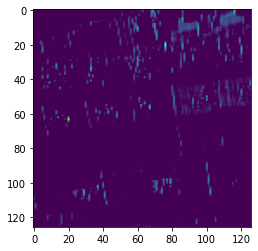

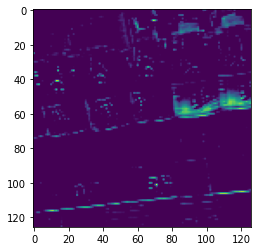

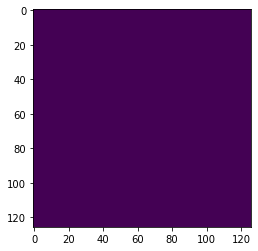

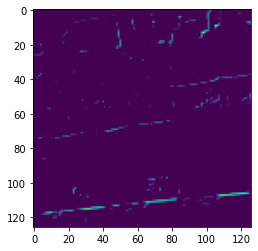

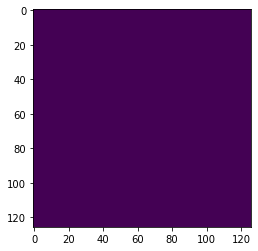

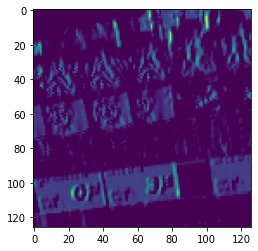

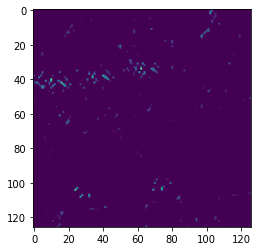

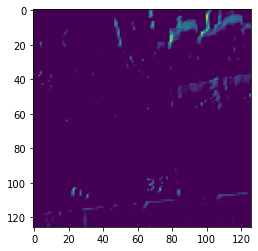

In [159]:
for i in range(10):
    plt.figure()
    plt.imshow(selected_batch[:, :, i])
    plt.show()